In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #to build model

In [44]:
data= pd.read_csv('company.csv')
data.head(10)

,yearsexp,salary
0,1.1,10000
1,1.3,12000
2,1.4,14000
3,1.6,16000
4,1.9,17000
5,2.0,18000
6,2.3,19000
7,2.4,19500
8,2.7,19900
9,3.1,20000


In [45]:
real_x=data.iloc[:,0].values   #it extract entire 0 column
real_y=data.iloc[:,1].values
real_x=real_x.reshape(-1,1)     #intially daimesnsion of x and y is (100,0) but we want 2d means (100,1)
real_y=real_y.reshape(-1,1)
print(real_y)


[[10000]
 [12000]
 [14000]
 [16000]
 [17000]
 [18000]
 [19000]
 [19500]
 [19900]
 [20000]
 [22000]
 [24000]
 [25000]
 [25500]
 [27000]
 [30000]
 [32000]
 [32500]
 [33000]
 [35000]
 [37000]
 [40000]
 [41000]
 [44000]]


In [46]:
training_x,testing_x,training_y,testing_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)
#here we are dividing whole data to 2 parts one is training test=70% and testing set=30%

In [47]:
Lin=LinearRegression()
Lin.fit(training_x,training_y)

LinearRegression()

In [48]:
pred_y=Lin.predict(testing_x)

In [51]:
# y = b0+b1x
Lin.coef_    #this is b1 value

array([[5269.00315118]])

In [52]:
Lin.intercept_     #b0 value

array([6122.15817385])

In [53]:
6122.15817385+5269.00315118*1.5 #if you see in original data the value for 1.4 years exp is 14000 which is almost close
#bo          + b1          *x

14025.662900619998

In [56]:
testing_y[6]

array([25500], dtype=int64)

In [37]:
pred_y[6]

array([27198.17077857])

Text(0, 0.5, 'salary')

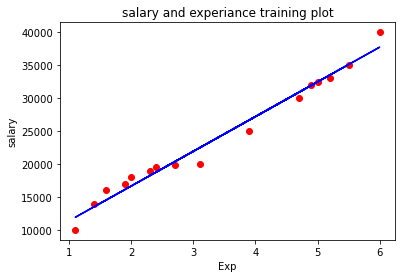

In [28]:
plt.scatter(training_x,training_y,color='r')
plt.plot(training_x,Lin.predict(training_x),color='b')
plt.title('salary and experiance training plot')
plt.xlabel('Exp')
plt.ylabel('salary')

Text(0, 0.5, 'salary')

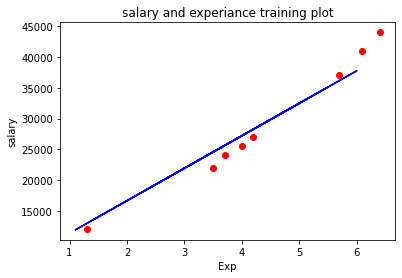

In [29]:
plt.scatter(testing_x,testing_y,color='r')   #training is changed to testing
plt.plot(training_x,Lin.predict(training_x),color='b')
plt.title('salary and experiance training plot')
plt.xlabel('Exp')
plt.ylabel('salary')

In [ ]:
#coding for multiple linear regression


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm

In [149]:
data =pd.read_csv('startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [150]:
real_x=data.iloc[:,0:4].values  #it means all rows and  columns from 0 to 3rd,profit is output we dont need that 
real_y=data.iloc[:,4].values  #4th column is profit which is output
real_y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [151]:
#label encoding
le=LabelEncoder()   #third column is of state name which includes 3 city's name (newyork,florida,california) so we give some dummy
                   #values to eavaluate the prediction properly
real_x[:,3]= le.fit_transform(real_x[:,3])
real_x[0:,3]  #if you observed output newyork is replaced with dummy value 2, california and florida is with 0 and 1 respectivly
#but we have to convert it in zero's and one's form

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0], dtype=object)

In [152]:
le=LabelEncoder()   
real_x[:,3]= le.fit_transform(real_x[:,3])   
OneHE=ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[3])],remainder='passthrough')
real_x=OneHE.fit_transform(real_x)
real_x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [167]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)
test_x

array([[0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 27892.92, 84710.77, 164470.71],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 72107.6, 127864.55, 353183.81],
       [0.0, 0.0, 1.0, 20229.59, 65947.93, 185265.1],
       [0.0, 0.0, 1.0, 61136.38, 152701.92, 88218.23],
       [0.0, 1.0, 0.0, 73994.56, 122782.75, 303319.26],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81],
       [0.0, 0.0, 1.0, 46014.02, 85047.44, 205517.64],
       [0.0, 1.0, 0.0, 75328.87, 144135.98, 134050.07],
       [1.0, 0.0, 0.0, 46426.07, 157693.92, 210797.67],
       [0.0, 1.0, 0.0, 91749.16, 114175.79, 294919.57]], dtype=object)

In [170]:
mlr=LinearRegression()   #MLR multi linear regression
mlr.fit(training_x,training_y)

LinearRegression()

In [174]:
pred_y=mlr.predict(test_x)  #this is predicted output  value
pred_y

array([104282.76472168, 132536.88499213, 133910.85007763,  72584.77489413,
       179920.92761886, 114549.31079235,  66444.43261347,  98404.96840123,
       114499.82808599, 169367.50639891,  96522.62539977,  88040.67182871,
       110949.99405521,  90419.18978512, 128020.4625006 ])

In [175]:
test_y    #this is actuall output value

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 ])

In [172]:
mlr.coef_

array([-2.55942855e+02,  2.07086137e+02,  4.88567185e+01,  7.90840255e-01,
        3.01968165e-02,  3.10148566e-02])

In [173]:
mlr.intercept_

42659.813725501444

In [206]:
#our predicted value is not that much accurate so we use an altarnate
real_x=np.append(arr=np.ones((50,1)).astype(int),values=real_x,axis=1)
real_x   #here we are making x0 value as 1

array([[1, 1, 0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 1, 1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1, 0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 1, 0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1, 0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 1, 0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 1, 1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1, 0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 1, 0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 1, 1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1, 0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 1, 1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1, 0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 1, 1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1, 0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 1, 0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
  

In [217]:
x_opt=np.array(real_x[:,[0,1,2,3,4,5]],dtype=float)  #extracting all columns

In [219]:
reg_ols=sm.OLS(endog=real_y,exog=x_opt).fit()  #ordinary least square methode(OLS)

In [220]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           2.76e-29
Time:                        04:27:42   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.106e+04   1119.878     18.806      0.000    1.88e+04    2.33e+04
x1          2.106e+04   1119.878     18.806      0.000    1.88e+04    2.33e+04
x2          6629.0960   1918.921      3.455      0.001    2766.507    1.05e+04
x3          7792.9623   2025.567      3.847      0.000    3715.707    1.19e+04
x4          6638.6928   1957.622      3.391      0.001    2698.203    1.06e+04
x5             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     4.72e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
#polynomial regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv('pos_salary.csv') #in simple liniear regression we cosnsidered only exp vs salary means there is linear 
data       #reletionship at that time but now due to positional level there is a non linearity

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [60]:
real_x=data.iloc[:,1:2].values   #we wrote [:,1:2] insted of [:1] beacuase we want in 2D
real_y=data.iloc[:,2].values
real_x                           #here we dont need position as salary depend only on level

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [61]:
data.iloc[:,1]   #this is in one daimension

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [62]:
linear_reg=LinearRegression()     #here we took simple linear regression for comparision
linear_reg.fit(real_x,real_y)

LinearRegression()

In [55]:
polynomial_reg=PolynomialFeatures(degree=2)
real_x_poly=polynomial_reg.fit_transform(real_x)    #our data alreay fitted for linear regression now we want to convert it 
polynomial_reg.fit(real_x_poly,real_y)              #for polynomial
linear_reg2=LinearRegression()
linear_reg2.fit(real_x_poly,real_y)

LinearRegression()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

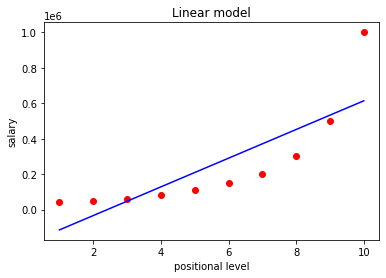

In [63]:
plt.scatter(real_x,real_y,color='r')  #1 st we are drawing for linear regression so that we can compair
plt.plot(real_x,linear_reg.predict(real_x),color='b')
plt.title('Linear model')
plt.xlabel('positional level')
plt.ylabel('salary')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

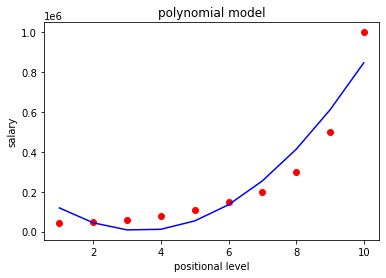

In [64]:
plt.scatter(real_x,real_y,color='r')  #1 st we are drawing for linear regression so that we can compair
plt.plot(real_x,linear_reg2.predict(real_x_poly),color='b')
plt.title('polynomial model')
plt.xlabel('positional level')
plt.ylabel('salary')
plt.plot         #if we increse the degree plot will fit accuratly 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [101]:
#decision tree   #if we have less data then we will not split it seems illogical
data=pd.read_csv('pos_salary.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [105]:
real_x=data.iloc[:,1:2].values
real_y=data.iloc[:,2].values

In [106]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(real_x,real_y)

DecisionTreeRegressor(random_state=0)

In [116]:
y_pred=reg.predict([[6]])
y_pred

array([150000.])

Text(0, 0.5, 'saary')

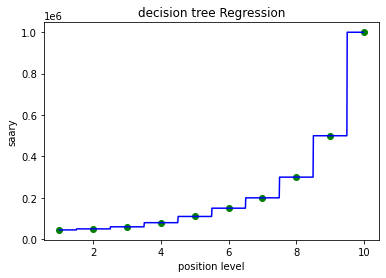

In [120]:
x_grid=np.arange(min(real_x),max(real_x),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(real_x,real_y,color='g')
plt.plot(x_grid,reg.predict(x_grid),color='b')
plt.title('decision tree Regression')
plt.xlabel('position level')
plt.ylabel('saary')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [3]:
data=pd.read_csv('pos_salary.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
real_x=data.iloc[1:,1:2].values
real_y=data.iloc[1:,2].values

In [14]:
reg=RandomForestRegressor(n_estimators=100,random_state=0)   #estimator means how much time alglorith repeat itself
reg.fit(real_x,real_y)   # as estimator value increses accuracy also increses because of excuting same algorithm again and again

RandomForestRegressor(random_state=0)

In [15]:
y_pred=reg.predict([[6]])
y_pred

array([144400.])

Text(0, 0.5, 'saary')

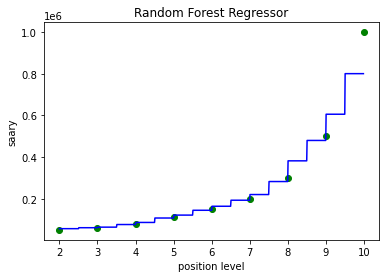

In [16]:
x_grid=np.arange(min(real_x),max(real_x),0.01)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(real_x,real_y,color='g')
plt.plot(x_grid,reg.predict(x_grid),color='b')
plt.title('Random Forest Regressor')
plt.xlabel('position level')
plt.ylabel('saary')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 

In [19]:
data=pd.read_csv('ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [24]:
real_x=data.iloc[:,[2,3]].values
real_y=data.iloc[:,4].values
real_x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [30]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [36]:
#here age is within 100 and salary is in thousands so both of them need to be scaled to a common range
scaler=StandardScaler()
training_x=scaler.fit_transform(training_x)
test_x=scaler.fit_transform(test_x)  #now we brought both data to a common range

In [39]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(training_x,training_y)

LogisticRegression(random_state=0)

In [45]:
y_pred=log_reg.predict(test_x)
y_pred   #predicted values for test data

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [47]:
test_y   #comapir output 45 and 47 our prediction is almost correct

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [51]:
#confusion matrix
#it comapairs output 45 and 47 and which we predicted correctly it separate it from wrong predictions
c_m=confusion_matrix(test_y,y_pred)
c_m  #out of 100 test data 63+24=87 predictions are correct and 8+5=13 are wrong predictins so accuracy is 87%

array([[63,  5],
       [ 8, 24]], dtype=int64)

In [77]:
#how to plot logestic regression
from matplotlib.colors import ListedColormap
x_set,y_set=training_x,training_y  #we substituted for new variables so that our training_x and training_y wii not get affected
#mash grid helps in fitting the graph properly in the graph box
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() -1,stop=x_set[:,0].max()+1,step=0.01))

ValueError: not enough values to unpack (expected 2, got 1)

In [27]:
#knn algorithm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [20]:
data=pd.read_csv('ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
real_x=data.iloc[:,[2,3]].values
real_y=data.iloc[:,4].values

In [9]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [22]:
#scaling
s_c=StandardScaler()
training_x=s_c.fit_transform(training_x)
test_x=s_c.fit_transform(test_x)

In [23]:
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(training_x,training_y)

KNeighborsClassifier()

In [24]:
y_pred=cls.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [25]:
test_y             #compair output 24 and 25 both are almost same

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
#confusion matrix
c_m=confusion_matrix(test_y,y_pred)
c_m         #64+29=93% are accurate wrong prediction   4+3=7

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [39]:
#support vector machine(SVM)  algorithm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [31]:
data=pd.read_csv('ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
real_x=data.iloc[:,[2,3]].values
real_y=data.iloc[:,4].values

In [33]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)

In [40]:
#scaling
s_c=StandardScaler()
training_x=s_c.fit_transform(training_x)
test_x=s_c.fit_transform(test_x)

In [41]:
cls_svc=SVC(kernel='linear',random_state=0)
cls_svc.fit(training_x,training_y)

SVC(kernel='linear', random_state=0)

In [46]:
y_pred=cls_svc.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [47]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [50]:
#confusion matrix
c_m=confusion_matrix(test_y,y_pred)
c_m         #63+25=88% are accurate wrong prediction   5+7=12

array([[63,  5],
       [ 7, 25]], dtype=int64)